#Pandas

##What is Pandas?
A Python library providing data structures and data analysis tools.

##Huh?
Think of it like Excel for Python that doesn't suck.

In [43]:
#By convention import pandas like:
import pandas as pd
#For fake data.
from numpy.random import randn
import numpy as np

#Series
Think of a Pandas Series as a _labeled_ one-dimensional vector. In fact, it need not be a numeric vector, it can contain arbitrary python objects.

In [44]:
int_series = pd.Series([i + 10 for i in xrange(10)])
int_series.head()

0    10
1    11
2    12
3    13
4    14
dtype: int64

In [45]:
num_series = pd.Series(randn(10))
num_series.head()

0    1.006335
1    0.943686
2    0.072052
3   -0.561034
4    0.733169
dtype: float64

In [46]:
str_series = pd.Series([x for x in 'abcde'*2])
str_series.head()

0    a
1    b
2    c
3    d
4    e
dtype: object

In [47]:
fun_series = pd.Series([lambda x: x*i for i in range(10)])
fun_series.head()

0    <function <lambda> at 0x132ecc488>
1    <function <lambda> at 0x132eccb90>
2    <function <lambda> at 0x132eccc08>
3    <function <lambda> at 0x132eccc80>
4    <function <lambda> at 0x132ecccf8>
dtype: object

#Indexes.
Notice how each series has an index (in this case a relatively meaningless default index).

Pandas can make great use of informative indexes. Indexes work similarly to a dictionary key, allowing fast lookups of the data associated with the index.

Indexes can also be exploited for fast group-bys, merges, time-series operations and lots more.

When you're really in the zone with pandas, you'll be thinking a lot about indexes.

In [48]:
indexed_series = pd.Series(randn(5), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky'])
alt_indexed_series = pd.Series(randn(5),
                               index = ['Washington', 'Alabama', 
                                        'Montana', 'Indiana', 
                                        'New York'])
print indexed_series
print '\n'
print alt_indexed_series

California   -0.775453
Alabama      -0.187505
Indiana      -1.495521
Montana       0.883465
Kentucky     -0.834188
dtype: float64


Washington   -1.908426
Alabama       0.601834
Montana       0.339667
Indiana      -0.752145
New York     -1.076266
dtype: float64


In [49]:
randn

<function randn>

In [50]:
#Pandas uses the index by default to align series for arithmetic!
indexed_series + alt_indexed_series

Alabama       0.414329
California         NaN
Indiana      -2.247666
Kentucky           NaN
Montana       1.223132
New York           NaN
Washington         NaN
dtype: float64

In [51]:
indexed_series = pd.Series(randn(5*100), 
                           index = ['California', 'Alabama', 
                                    'Indiana', 'Montana', 
                                    'Kentucky']*100)

#If you have non-unique indexes, you can use them 
#to do groupby operations.
indexed_series.groupby(level=0).mean()

Alabama       0.096566
California    0.003965
Indiana       0.101769
Kentucky      0.073375
Montana       0.154150
dtype: float64

In [52]:
indexed_series['Alabama']

Alabama    0.407137
Alabama   -0.605136
Alabama    1.208549
Alabama   -1.675229
Alabama    0.388081
Alabama    1.099500
Alabama   -1.273222
Alabama   -0.962282
Alabama   -0.732389
Alabama   -1.596713
Alabama   -2.321826
Alabama   -2.056358
Alabama   -0.684123
Alabama    1.072933
Alabama    0.245200
Alabama   -0.315406
Alabama    0.775253
Alabama    0.521265
Alabama    1.060680
Alabama   -0.673585
Alabama    0.378784
Alabama   -0.265631
Alabama    0.596083
Alabama   -0.201401
Alabama   -0.168350
Alabama    0.149781
Alabama    0.451899
Alabama   -0.382803
Alabama   -0.353658
Alabama   -1.101916
             ...   
Alabama   -0.512687
Alabama   -0.900939
Alabama   -0.635252
Alabama   -0.661041
Alabama    1.309125
Alabama   -0.030970
Alabama    1.187511
Alabama   -0.626553
Alabama   -1.583957
Alabama    1.990285
Alabama    1.158375
Alabama    1.356672
Alabama    1.335114
Alabama    1.383221
Alabama    1.071085
Alabama   -0.705745
Alabama    0.751454
Alabama    0.692177
Alabama   -1.164334


In [53]:
#Datetime index
dt_index = pd.date_range('2015-1-1', 
                        '2015-11-1', 
                        freq='m')
dt_series = pd.Series(randn(10), 
                      index = dt_index)
dt_series

2015-01-31   -0.692082
2015-02-28    1.495285
2015-03-31    0.607731
2015-04-30    1.335168
2015-05-31   -1.693763
2015-06-30    0.123814
2015-07-31    2.471251
2015-08-31    1.395070
2015-09-30   -0.334911
2015-10-31   -0.394800
Freq: M, dtype: float64

In [54]:
#Datetime indexes make it easy to transform freqs etc!
dt_series.resample('q').mean()

2015-03-31    0.470311
2015-06-30   -0.078260
2015-09-30    1.177137
2015-12-31   -0.394800
Freq: Q-DEC, dtype: float64

In [55]:
dt_series

2015-01-31   -0.692082
2015-02-28    1.495285
2015-03-31    0.607731
2015-04-30    1.335168
2015-05-31   -1.693763
2015-06-30    0.123814
2015-07-31    2.471251
2015-08-31    1.395070
2015-09-30   -0.334911
2015-10-31   -0.394800
Freq: M, dtype: float64

#DataFrames
Data frames extend the concept of Series to table-like data.

In [56]:
df = pd.DataFrame(randn(10, 5), index=dt_index, columns=[x for x in 'abcde'])
df

,a,b,c,d,e
2015-01-31,0.424187,0.185441,-0.891893,0.397587,0.619936
2015-02-28,-0.654483,0.298451,1.940105,-0.299176,0.144280
2015-03-31,1.243162,1.828352,-1.296907,2.297991,-0.955161
2015-04-30,1.203313,-1.938373,-0.394935,1.252614,0.937311
2015-05-31,1.039116,0.675949,0.021356,-0.969792,-0.991426
2015-06-30,-2.315052,0.407984,-0.271221,0.516628,0.913065
2015-07-31,0.521136,0.866788,0.399734,0.892011,2.104426
2015-08-31,-0.500195,-1.938934,-0.594108,-2.344727,-0.833046
2015-09-30,0.142694,0.180279,-0.726867,-0.179593,-0.443363
2015-10-31,0.637735,0.287018,0.163205,0.673314,0.284388


In [57]:
#A dataframes columns are series:
col = df.a
type(col)

pandas.core.series.Series

In [58]:
df['a']

2015-01-31    0.424187
2015-02-28   -0.654483
2015-03-31    1.243162
2015-04-30    1.203313
2015-05-31    1.039116
2015-06-30   -2.315052
2015-07-31    0.521136
2015-08-31   -0.500195
2015-09-30    0.142694
2015-10-31    0.637735
Freq: M, Name: a, dtype: float64

In [59]:
#So are the rows.
row = df.ix['2015-01-31']
type(row)

pandas.core.series.Series

In [60]:
df.loc['2015-01-31']

a    0.424187
b    0.185441
c   -0.891893
d    0.397587
e    0.619936
Name: 2015-01-31 00:00:00, dtype: float64

In [61]:
df.iloc[0]

a    0.424187
b    0.185441
c   -0.891893
d    0.397587
e    0.619936
Name: 2015-01-31 00:00:00, dtype: float64

In [62]:
df.ix[0]

a    0.424187
b    0.185441
c   -0.891893
d    0.397587
e    0.619936
Name: 2015-01-31 00:00:00, dtype: float64

In [63]:
#The columns all have the same index:
col.index   

DatetimeIndex(['2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31', '2015-08-31',
               '2015-09-30', '2015-10-31'],
              dtype='datetime64[ns]', freq='M')

In [64]:
#What's the index for the rows?
row.index

Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')

#DataFrame basics

In [65]:
#New column
df['new'] = df['a'] + df['b']
df

,a,b,c,d,e,new
2015-01-31,0.424187,0.185441,-0.891893,0.397587,0.619936,0.609627
2015-02-28,-0.654483,0.298451,1.940105,-0.299176,0.144280,-0.356032
2015-03-31,1.243162,1.828352,-1.296907,2.297991,-0.955161,3.071514
2015-04-30,1.203313,-1.938373,-0.394935,1.252614,0.937311,-0.735060
2015-05-31,1.039116,0.675949,0.021356,-0.969792,-0.991426,1.715065
2015-06-30,-2.315052,0.407984,-0.271221,0.516628,0.913065,-1.907068
2015-07-31,0.521136,0.866788,0.399734,0.892011,2.104426,1.387924
2015-08-31,-0.500195,-1.938934,-0.594108,-2.344727,-0.833046,-2.439129
2015-09-30,0.142694,0.180279,-0.726867,-0.179593,-0.443363,0.322973
2015-10-31,0.637735,0.287018,0.163205,0.673314,0.284388,0.924752


In [66]:
df['a'] + df['b']

2015-01-31    0.609627
2015-02-28   -0.356032
2015-03-31    3.071514
2015-04-30   -0.735060
2015-05-31    1.715065
2015-06-30   -1.907068
2015-07-31    1.387924
2015-08-31   -2.439129
2015-09-30    0.322973
2015-10-31    0.924752
Freq: M, dtype: float64

In [67]:
#Delete a column
df2 = df.drop('new', axis=1)

In [68]:
df

,a,b,c,d,e,new
2015-01-31,0.424187,0.185441,-0.891893,0.397587,0.619936,0.609627
2015-02-28,-0.654483,0.298451,1.940105,-0.299176,0.144280,-0.356032
2015-03-31,1.243162,1.828352,-1.296907,2.297991,-0.955161,3.071514
2015-04-30,1.203313,-1.938373,-0.394935,1.252614,0.937311,-0.735060
2015-05-31,1.039116,0.675949,0.021356,-0.969792,-0.991426,1.715065
2015-06-30,-2.315052,0.407984,-0.271221,0.516628,0.913065,-1.907068
2015-07-31,0.521136,0.866788,0.399734,0.892011,2.104426,1.387924
2015-08-31,-0.500195,-1.938934,-0.594108,-2.344727,-0.833046,-2.439129
2015-09-30,0.142694,0.180279,-0.726867,-0.179593,-0.443363,0.322973
2015-10-31,0.637735,0.287018,0.163205,0.673314,0.284388,0.924752


##Axis?
Because pandas thinks of rows and columns as both being series, anything we can do to rows we can do to columns too. 

Axis describes which one we want to do it to. 0=rows, 1=columns.

In [69]:
lbl = pd.Timestamp('2015-04-30 00:00:00', offset='M')
df.drop(lbl, axis=0)

/Users/dan/.virtualenvs/pandas/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: offset is deprecated. Use freq instead
  """Entry point for launching an IPython kernel.


,a,b,c,d,e,new
2015-01-31,0.424187,0.185441,-0.891893,0.397587,0.619936,0.609627
2015-02-28,-0.654483,0.298451,1.940105,-0.299176,0.144280,-0.356032
2015-03-31,1.243162,1.828352,-1.296907,2.297991,-0.955161,3.071514
2015-05-31,1.039116,0.675949,0.021356,-0.969792,-0.991426,1.715065
2015-06-30,-2.315052,0.407984,-0.271221,0.516628,0.913065,-1.907068
2015-07-31,0.521136,0.866788,0.399734,0.892011,2.104426,1.387924
2015-08-31,-0.500195,-1.938934,-0.594108,-2.344727,-0.833046,-2.439129
2015-09-30,0.142694,0.180279,-0.726867,-0.179593,-0.443363,0.322973
2015-10-31,0.637735,0.287018,0.163205,0.673314,0.284388,0.924752


In [70]:
df

,a,b,c,d,e,new
2015-01-31,0.424187,0.185441,-0.891893,0.397587,0.619936,0.609627
2015-02-28,-0.654483,0.298451,1.940105,-0.299176,0.144280,-0.356032
2015-03-31,1.243162,1.828352,-1.296907,2.297991,-0.955161,3.071514
2015-04-30,1.203313,-1.938373,-0.394935,1.252614,0.937311,-0.735060
2015-05-31,1.039116,0.675949,0.021356,-0.969792,-0.991426,1.715065
2015-06-30,-2.315052,0.407984,-0.271221,0.516628,0.913065,-1.907068
2015-07-31,0.521136,0.866788,0.399734,0.892011,2.104426,1.387924
2015-08-31,-0.500195,-1.938934,-0.594108,-2.344727,-0.833046,-2.439129
2015-09-30,0.142694,0.180279,-0.726867,-0.179593,-0.443363,0.322973
2015-10-31,0.637735,0.287018,0.163205,0.673314,0.284388,0.924752


#Selecting subsets.
There a couple of ways to select a subset of a python data frame.

In [71]:
#To subset the rows, you can use the convenient:
df[df['a'] > 0]

,a,b,c,d,e,new
2015-01-31,0.424187,0.185441,-0.891893,0.397587,0.619936,0.609627
2015-03-31,1.243162,1.828352,-1.296907,2.297991,-0.955161,3.071514
2015-04-30,1.203313,-1.938373,-0.394935,1.252614,0.937311,-0.735060
2015-05-31,1.039116,0.675949,0.021356,-0.969792,-0.991426,1.715065
2015-07-31,0.521136,0.866788,0.399734,0.892011,2.104426,1.387924
2015-09-30,0.142694,0.180279,-0.726867,-0.179593,-0.443363,0.322973
2015-10-31,0.637735,0.287018,0.163205,0.673314,0.284388,0.924752


In [72]:
#Or combine multiple conditions:
df[(df.a > 0) & (df.c < 0)]

,a,b,c,d,e,new
2015-01-31,0.424187,0.185441,-0.891893,0.397587,0.619936,0.609627
2015-03-31,1.243162,1.828352,-1.296907,2.297991,-0.955161,3.071514
2015-04-30,1.203313,-1.938373,-0.394935,1.252614,0.937311,-0.735060
2015-09-30,0.142694,0.180279,-0.726867,-0.179593,-0.443363,0.322973


In [73]:
#Selecting a column
df.a
#Works sometimes.

2015-01-31    0.424187
2015-02-28   -0.654483
2015-03-31    1.243162
2015-04-30    1.203313
2015-05-31    1.039116
2015-06-30   -2.315052
2015-07-31    0.521136
2015-08-31   -0.500195
2015-09-30    0.142694
2015-10-31    0.637735
Freq: M, Name: a, dtype: float64

In [74]:
df['a'] #works always

2015-01-31    0.424187
2015-02-28   -0.654483
2015-03-31    1.243162
2015-04-30    1.203313
2015-05-31    1.039116
2015-06-30   -2.315052
2015-07-31    0.521136
2015-08-31   -0.500195
2015-09-30    0.142694
2015-10-31    0.637735
Freq: M, Name: a, dtype: float64

In [75]:
df[['a', 'b']]
#Or a subset of columns

,a,b
2015-01-31,0.424187,0.185441
2015-02-28,-0.654483,0.298451
2015-03-31,1.243162,1.828352
2015-04-30,1.203313,-1.938373
2015-05-31,1.039116,0.675949
2015-06-30,-2.315052,0.407984
2015-07-31,0.521136,0.866788
2015-08-31,-0.500195,-1.938934
2015-09-30,0.142694,0.180279
2015-10-31,0.637735,0.287018


#Advanced selection.
The above methods work for simple types of selections, but what if you need something more complex?

In [76]:
df.loc['2015-05-31':'2015-08-31', 'c':'e'] #Ranges by label.

,c,d,e
2015-05-31,0.021356,-0.969792,-0.991426
2015-06-30,-0.271221,0.516628,0.913065
2015-07-31,0.399734,0.892011,2.104426
2015-08-31,-0.594108,-2.344727,-0.833046


In [77]:
df.iloc[2:-3,2:5] #Ranges by number.

,c,d,e
2015-03-31,-1.296907,2.297991,-0.955161
2015-04-30,-0.394935,1.252614,0.937311
2015-05-31,0.021356,-0.969792,-0.991426
2015-06-30,-0.271221,0.516628,0.913065
2015-07-31,0.399734,0.892011,2.104426


In [78]:
#SQL-like queries for parsimonious row selection.
#Experimental
df.query('a > 1 and c <1')

,a,b,c,d,e,new
2015-03-31,1.243162,1.828352,-1.296907,2.297991,-0.955161,3.071514
2015-04-30,1.203313,-1.938373,-0.394935,1.252614,0.937311,-0.735060
2015-05-31,1.039116,0.675949,0.021356,-0.969792,-0.991426,1.715065


In [79]:
#Multi Index:
dt_index = pd.date_range('2015-1-1', 
                        '2017-7-1', 
                        freq='m')
df = pd.DataFrame(randn(30,5), index=dt_index)

In [80]:
df['state'] = ['Alabama', 'Alaska' , 'Arizona'] * 10
df.head()

,0,1,2,3,4,state
2015-01-31,-1.535318,-0.659581,-2.059859,-0.095004,0.052339,Alabama
2015-02-28,0.957904,-0.614561,-2.051313,-0.172500,0.382566,Alaska
2015-03-31,0.683149,0.361947,0.330422,-0.992731,-2.562506,Arizona
2015-04-30,1.463378,0.499032,-0.244120,0.030788,-1.118923,Alabama
2015-05-31,0.906240,-1.118386,-1.015312,-0.705858,-2.179260,Alaska


In [81]:
df = df.reset_index()
df = df.set_index(['state', 'index'])
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-1.535318,-0.659581,-2.059859,-0.095004,0.052339
Alaska,2015-02-28,0.957904,-0.614561,-2.051313,-0.172500,0.382566
Arizona,2015-03-31,0.683149,0.361947,0.330422,-0.992731,-2.562506
Alabama,2015-04-30,1.463378,0.499032,-0.244120,0.030788,-1.118923
Alaska,2015-05-31,0.906240,-1.118386,-1.015312,-0.705858,-2.179260


In [82]:
df.loc['Alabama'].head()

,0,1,2,3,4
index,,,,,
2015-01-31,-1.535318,-0.659581,-2.059859,-0.095004,0.052339
2015-04-30,1.463378,0.499032,-0.244120,0.030788,-1.118923
2015-07-31,-1.815991,-0.176974,1.114214,0.906525,0.682195
2015-10-31,-1.320991,-0.039426,0.375936,0.335449,1.759226
2016-01-31,0.400241,0.535632,0.408407,0.441412,1.553293


In [83]:
df.loc['2015-01-31'] #Doesn't work.

KeyError: 'the label [2015-01-31] is not in the [index]'

In [84]:
df.loc[('Alabama', '2015-01-31')] #Can do this.

0   -1.535318
1   -0.659581
2   -2.059859
3   -0.095004
4    0.052339
Name: (Alabama, 2015-01-31 00:00:00), dtype: float64

In [85]:
#Can also have multi-index in columns.
df.reset_index().set_index(['index', 'state']).unstack().head()

0                             1                      \
state        Alabama    Alaska   Arizona   Alabama    Alaska   Arizona   
index                                                                    
2015-01-31 -1.535318       NaN       NaN -0.659581       NaN       NaN   
2015-02-28       NaN  0.957904       NaN       NaN -0.614561       NaN   
2015-03-31       NaN       NaN  0.683149       NaN       NaN  0.361947   
2015-04-30  1.463378       NaN       NaN  0.499032       NaN       NaN   
2015-05-31       NaN  0.906240       NaN       NaN -1.118386       NaN   

                   2                             3                      \
state        Alabama    Alaska   Arizona   Alabama    Alaska   Arizona   
index                                                                    
2015-01-31 -2.059859       NaN       NaN -0.095004       NaN       NaN   
2015-02-28       NaN -2.051313       NaN       NaN -0.172500       NaN   
2015-03-31       NaN       NaN  0.330422       NaN       NaN -0.992731   
2015-04-30 -0.244120       NaN       NaN  0.030788       NaN       NaN   
2015-05-31       NaN -1.015312       NaN       NaN -0.705858       NaN   

                   4                      
state        Alabama    Alaska   Arizona  
index                                     
2015-01-31  0.052339       NaN       NaN  
2015-02-28       NaN  0.382566       NaN  
2015-03-31       NaN       NaN -2.562506  
2015-04-30 -1.118923       NaN       NaN  
2015-05-31       NaN -2.179260       NaN

In [86]:
df.head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-1.535318,-0.659581,-2.059859,-0.095004,0.052339
Alaska,2015-02-28,0.957904,-0.614561,-2.051313,-0.172500,0.382566
Arizona,2015-03-31,0.683149,0.361947,0.330422,-0.992731,-2.562506
Alabama,2015-04-30,1.463378,0.499032,-0.244120,0.030788,-1.118923
Alaska,2015-05-31,0.906240,-1.118386,-1.015312,-0.705858,-2.179260


#split-apply-combine

In [87]:
df.groupby(level=1).mean().head()

,0,1,2,3,4
index,,,,,
2015-01-31,-1.535318,-0.659581,-2.059859,-0.095004,0.052339
2015-02-28,0.957904,-0.614561,-2.051313,-0.172500,0.382566
2015-03-31,0.683149,0.361947,0.330422,-0.992731,-2.562506
2015-04-30,1.463378,0.499032,-0.244120,0.030788,-1.118923
2015-05-31,0.906240,-1.118386,-1.015312,-0.705858,-2.179260


In [88]:
df.groupby(level=0).mean().head() #Groupby index

,0,1,2,3,4
state,,,,,
Alabama,-0.294015,0.378143,-0.272110,0.564878,-0.195203
Alaska,0.530297,-0.879668,-0.478329,-0.168765,-0.091122
Arizona,-0.157923,-0.031870,0.441283,-0.159877,-0.249299


In [89]:
#Groupby doesn't have to be on index.
df.reset_index().groupby('state').mean().head()
#'state' could be a list of columns to group on.

,0,1,2,3,4
state,,,,,
Alabama,-0.294015,0.378143,-0.272110,0.564878,-0.195203
Alaska,0.530297,-0.879668,-0.478329,-0.168765,-0.091122
Arizona,-0.157923,-0.031870,0.441283,-0.159877,-0.249299


In [90]:
#Apply
g = df.groupby(level=0)

In [91]:
#If one row for each index.
g.aggregate(np.mean)

,0,1,2,3,4
state,,,,,
Alabama,-0.294015,0.378143,-0.272110,0.564878,-0.195203
Alaska,0.530297,-0.879668,-0.478329,-0.168765,-0.091122
Arizona,-0.157923,-0.031870,0.441283,-0.159877,-0.249299


In [92]:
#If same shape as original:
g.transform(lambda x: (x - x.mean())/x.std()).head()

,,0,1,2,3,4
state,index,,,,,
Alabama,2015-01-31,-0.817501,-1.069838,-1.939239,-0.706159,0.206713
Alaska,2015-02-28,0.514303,0.355061,-1.312191,-0.003561,0.399299
Arizona,2015-03-31,0.961484,0.554143,-0.101270,-0.915931,-1.613929
Alabama,2015-04-30,1.157389,0.124630,0.030361,-0.571546,-0.771364
Alaska,2015-05-31,0.452165,-0.319718,-0.447954,-0.512036,-1.760212


In [93]:
#Different index than I started with.
g.apply(lambda x: x.describe()).head(12)

0          1          2          3          4
state                                                               
Alabama count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean   -0.294015   0.378143  -0.272110   0.564878  -0.195203
        std     1.518412   0.969983   0.921882   0.934466   1.197515
        min    -2.014115  -0.781046  -2.059859  -0.867382  -1.937355
        25%    -1.481736  -0.142587  -0.866701  -0.063556  -0.923800
        50%    -0.464952   0.242782  -0.116214   0.388430  -0.556038
        75%     0.322515   0.719715   0.371266   1.206553   0.524731
        max     2.723212   2.547010   1.114214   2.212153   1.759226
Alaska  count  10.000000  10.000000  10.000000  10.000000  10.000000
        mean    0.530297  -0.879668  -0.478329  -0.168765  -0.091122
        std     0.831429   0.746651   1.198746   1.048938   1.186299
        min    -0.678926  -1.789336  -2.051313  -1.316932  -2.179260

#Reading and writing data.


In [94]:
df.to_csv('saved_data.csv', delimiter='\t')

TypeError: to_csv() got an unexpected keyword argument 'delimiter'

In [95]:
read = pd.read_csv('saved_data.csv', delimiter='\t')
#TONS OF options for reading data

IOError: File saved_data.csv does not exist

In [96]:
"""Other methods:
pd.read_excel
pd.read_sql
pd.read_stata
...
"""

'Other methods:\npd.read_excel\npd.read_sql\npd.read_stata\n...\n'

#Other very useful things.

join, concat and merge

In [97]:
state_df = pd.DataFrame({'governor':['Robert Bentley',
                                    'Bill Walker',
                                    'Doug Ducey',
                                    'Asa Hutchinson']}, 
                        index=['Alabama', 'Alaska', 'Arizona', 'Arkansas'])
#Note merge is most useful when you want to merge on something other than the index.
#Default is to merge on common column names.
pd.merge(df.reset_index(), state_df, 
         left_on='state', right_index=True, how='right').tail()

,state,index,0,1,2,3,4,governor
20,Arizona,2016-09-30,1.166778,0.215424,1.676064,0.789007,0.882805,Doug Ducey
23,Arizona,2016-12-31,-2.074321,0.511545,-0.838102,-0.121717,0.807526,Doug Ducey
26,Arizona,2017-03-31,-0.094881,-0.022026,0.909659,-1.230812,1.006387,Doug Ducey
29,Arizona,2017-06-30,-0.487389,-0.451617,0.646114,-0.147433,0.132407,Doug Ducey
29,Arkansas,NaT,NaN,NaN,NaN,NaN,NaN,Asa Hutchinson


In [98]:
state_avg = df.groupby(level=0).mean()
state_avg.head()

,0,1,2,3,4
state,,,,,
Alabama,-0.294015,0.378143,-0.272110,0.564878,-0.195203
Alaska,0.530297,-0.879668,-0.478329,-0.168765,-0.091122
Arizona,-0.157923,-0.031870,0.441283,-0.159877,-0.249299


In [99]:
#Concat allows joining along the axes.
pd.concat([state_avg, state_df], axis=1)

,0,1,2,3,4,governor
Alabama,-0.294015,0.378143,-0.272110,0.564878,-0.195203,Robert Bentley
Alaska,0.530297,-0.879668,-0.478329,-0.168765,-0.091122,Bill Walker
Arizona,-0.157923,-0.031870,0.441283,-0.159877,-0.249299,Doug Ducey
Arkansas,NaN,NaN,NaN,NaN,NaN,Asa Hutchinson


In [100]:
#Join also works. Just like merge, but 
#default is to join on indexes.
state_avg.join(state_df, how='right')

,0,1,2,3,4,governor
Alabama,-0.294015,0.378143,-0.272110,0.564878,-0.195203,Robert Bentley
Alaska,0.530297,-0.879668,-0.478329,-0.168765,-0.091122,Bill Walker
Arizona,-0.157923,-0.031870,0.441283,-0.159877,-0.249299,Doug Ducey
Arkansas,NaN,NaN,NaN,NaN,NaN,Asa Hutchinson


#Exploratory Data Analysis with Pandas

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

In [102]:
df = pd.read_csv('data/playgolf.csv', delimiter='|' )
print df.head()

         Date   Outlook  Temperature  Humidity  Windy      Result
0  07-01-2014     sunny           85        85  False  Don't Play
1  07-02-2014     sunny           80        90   True  Don't Play
2  07-03-2014  overcast           83        78  False        Play
3  07-04-2014      rain           70        96  False        Play
4  07-05-2014      rain           68        80  False        Play


#Describe the continuous variables
##This treats the Boolean Windy variable as a series of 0's and 1's

In [103]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,14.0,73.571429,6.571667,64.0,69.25,72.0,78.75,85.0
Humidity,14.0,80.285714,9.840486,65.0,71.25,80.0,88.75,96.0


Can see the general pattern of Temperature and Humidity and mean of a Boolean represents the percentage

##We can make use of df.plot() to produce simple graphs that calls on the more adjustable Matplotlib library 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1084fb910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10864da90>]], dtype=object)

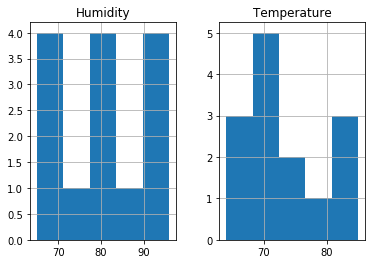

In [104]:
df.hist(['Temperature','Humidity'],bins=5)

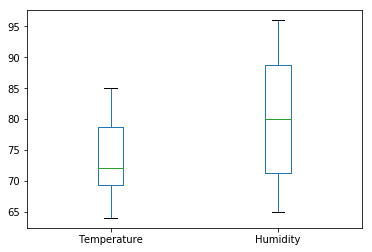

In [105]:
df[['Temperature','Humidity']].plot(kind='box')

###Scatterplots for examining bivariate relationships

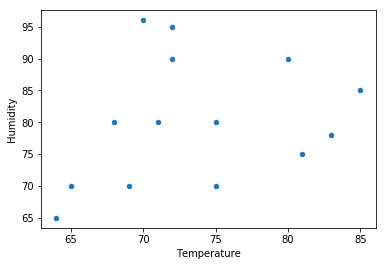

In [106]:
df.plot('Temperature', 'Humidity', kind='scatter')

###If we want to color the scatterplots according to a category, it requires a bit of matplotlib...ugh!

In [107]:
groups=df.groupby('Outlook')
for name, group in groups:
    print name

overcast
rain
sunny


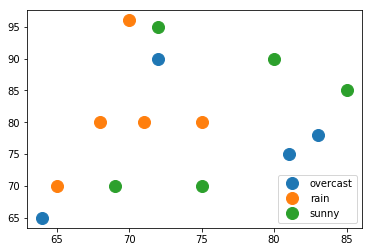

In [108]:
fig, ax = plt.subplots()

ax.margins(0.05)
for name, group in groups:
    ax.plot(group.Temperature, group.Humidity, marker='o', linestyle='', ms=12, label=name)
ax.legend(numpoints=1, loc='lower right')

plt.show()

#What about the categorical variables? Frequency tables and relative frequency tables

###Simply df.value_counts() gets you the frequencies

In [109]:
df['Outlook'].value_counts()

rain        5
sunny       5
overcast    4
Name: Outlook, dtype: int64

###Using apply will get you the value counts for multiple columns at once

In [110]:
df[['Outlook','Result']].apply(lambda x: x.value_counts())

,Outlook,Result
Don't Play,NaN,5.0
Play,NaN,9.0
overcast,4.0,NaN
rain,5.0,NaN
sunny,5.0,NaN


###Contingency Tables for looking at bivariate relationships between two categorical variables

In [111]:
pd.crosstab(df['Outlook'], df['Result'])

Result,Don't Play,Play
Outlook,,
overcast,0,4
rain,2,3
sunny,3,2


###Often we want the row percentages

In [112]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda r: r/r.sum(), axis=1)

Result,Don't Play,Play
Outlook,,
overcast,0.0,1.0
rain,0.4,0.6
sunny,0.6,0.4


###Or the column percentages

In [113]:
pd.crosstab(df['Outlook'], df['Result']).apply(lambda c: c/c.sum(), axis=0)

Result,Don't Play,Play
Outlook,,
overcast,0.0,0.444444
rain,0.4,0.333333
sunny,0.6,0.222222


#Enough...lets get to the pair sprint

https://www.youtube.com/watch?v=yGf6LNWY9AI